In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
df = pd.read_csv('data/MetObjects.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218408 entries, 6 to 474417
Data columns (total 51 columns):
Object Number              218408 non-null object
Is Highlight               218408 non-null bool
Is Timeline Work           218408 non-null bool
Is Public Domain           218408 non-null bool
Object ID                  218408 non-null int64
Department                 218408 non-null object
AccessionYear              216925 non-null object
Object Name                217940 non-null object
Title                      197621 non-null object
Culture                    94460 non-null object
Period                     37539 non-null object
Dynasty                    5050 non-null object
Reign                      2418 non-null object
Portfolio                  7758 non-null object
Artist Role                138180 non-null object
Artist Prefix              42470 non-null object
Artist Display Name        138934 non-null object
Artist Display Bio         117505 non-null object
Artis

Removing items without tags

In [46]:
df.Tags.isnull().sum()

256010

In [47]:
df.dropna(subset = ["Tags"], inplace = True)
df.Tags.isnull().sum()

0

In [53]:
words_list = '|'.join(df.Tags).split('|')

Get the list of unique words in tags

In [56]:
unique_words = set(words_list)
len(unique_words)

1112

In [59]:
words_count = dict.fromkeys(unique_words, 0)


In [60]:
for word in words_list: 
    words_count[word] += 1

In [64]:
words_count_dict = {k: v for k, v in sorted(words_count.items(), reverse = True, key=lambda item: item[1])}

### What are the top 30 most used tags overall?

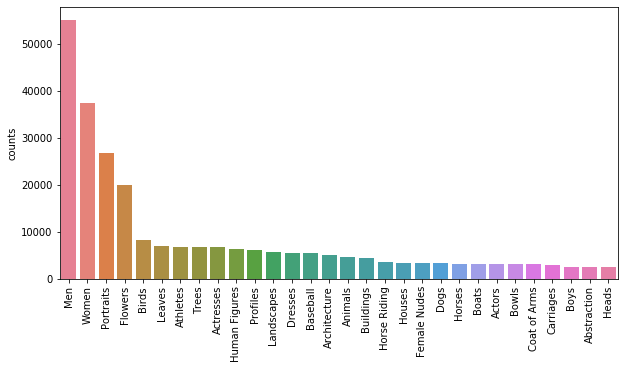

In [82]:
X = list(words_count_dict.keys())[0:30]
Y = list(words_count_dict.values())[0:30]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x=X, y=Y, palette="husl", ax=ax)
ax.set_ylabel("counts")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Let's visualize it as a wordcloud for fun using the wordcloud package.

In [86]:
from wordcloud import WordCloud

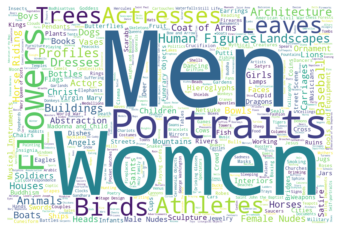

In [95]:
wc = WordCloud(background_color="white", width=1200, height=800, max_words=500)
wc.generate_from_frequencies(words_count_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [96]:
wc.to_file('overall.jpg')

These words seems rather very concrete and descriptive. 
Next, let's see if there's any difference in tagging for artworks with tag 'abstraction'

In [105]:
abstract_words_list = df.Tags[df.Tags.apply(lambda x: 'Abstraction' in x)]

In [110]:
abstract_words_list = '|'.join(abstract_words_list).split('|')

In [113]:
abstract_words_list = list(filter(lambda x: x != 'Abstraction', abstract_words_list))

In [115]:
ab_unique_words = set(abstract_words_list)
len(ab_unique_words)

63

In [117]:
ab_words_count = dict.fromkeys(ab_unique_words, 0)
for word in abstract_words_list: 
    ab_words_count[word] += 1

In [118]:
ab_words_count_dict = {k: v for k, v in sorted(ab_words_count.items(), reverse = True, key=lambda item: item[1])}

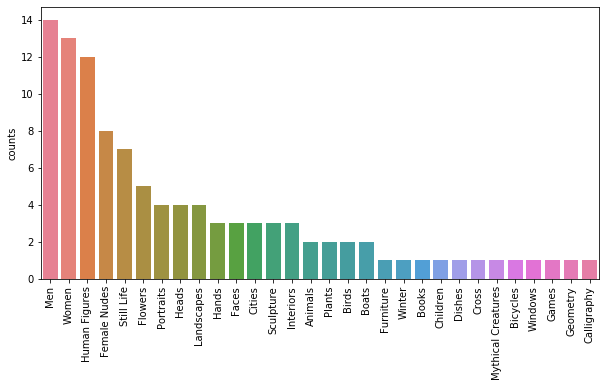

In [119]:
X = list(ab_words_count_dict.keys())[0:30]
Y = list(ab_words_count_dict.values())[0:30]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x=X, y=Y, palette="husl", ax=ax)
ax.set_ylabel("counts")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

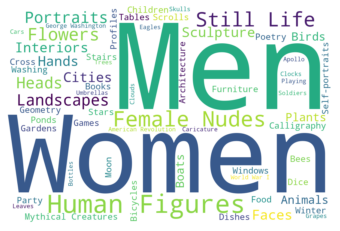

In [120]:
wc2 = WordCloud(background_color="white", width=1200, height=800, max_words=500)
wc2.generate_from_frequencies(ab_words_count_dict)

# show
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.show()


This alone doesn't say much. How about any other features?

In [122]:
df['abstract'] = df.Tags.apply(lambda x: 'Abstraction' in x)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218408 entries, 6 to 474417
Data columns (total 52 columns):
Object Number              218408 non-null object
Is Highlight               218408 non-null bool
Is Timeline Work           218408 non-null bool
Is Public Domain           218408 non-null bool
Object ID                  218408 non-null int64
Department                 218408 non-null object
AccessionYear              216925 non-null object
Object Name                217940 non-null object
Title                      197621 non-null object
Culture                    94460 non-null object
Period                     37539 non-null object
Dynasty                    5050 non-null object
Reign                      2418 non-null object
Portfolio                  7758 non-null object
Artist Role                138180 non-null object
Artist Prefix              42470 non-null object
Artist Display Name        138934 non-null object
Artist Display Bio         117505 non-null object
Artis